## Data Preparation and EDA

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 

# for displaying all the rows and columns
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

pd.options.mode.chained_assignment = None

### Load data file

In [120]:
raw_df = pd.read_csv('listings.csv', index_col='id')
print('Data contains %d Airbnb Listings in LA with %d attributes' %(raw_df.shape[0], raw_df.shape[1]))
raw_df.head()

Data contains 45815 Airbnb Listings in LA with 74 attributes


,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
183319,https://www.airbnb.com/rooms/183319,20220909140055,2022-09-10,previous scrape,Panoramic Ocean View Venice Beach,Craftsmen style penthouse with ocean view from...,About as close to the beach as you can live in...,https://a0.muscache.com/pictures/1170205/e2596...,867995,https://www.airbnb.com/users/show/867995,Barbara X,2011-07-25,"Los Angeles, CA",Serious yoga practice. Been studying for 25 y...,within a day,100%,100%,f,https://a0.muscache.com/im/users/867995/profil...,https://a0.muscache.com/im/users/867995/profil...,Venice,2.0,3.0,"['email', 'phone']",t,f,"Los Angeles, California, United States",Venice,City of Los Angeles,33.99211,-118.47600,Entire rental unit,Entire home/apt,2,NaN,1 bath,2.0,2.0,"[""Bed linens"", ""Heating"", ""Dishes and silverwa...",$152.00,30,90,30.0,30.0,90.0,90.0,30.0,90.0,NaN,t,0,0,0,0,2022-09-10,3,0,0,2012-03-11,2019-02-25,5.00,4.67,4.67,5.00,5.00,5.00,5.00,NaN,f,2,2,0,0,0.02
51307,https://www.airbnb.com/rooms/51307,20220909140055,2022-09-10,city scrape,Spanish Bungalow Guest House LA CA. 30 plus ni...,PRIVATE GUEST HOUSE<br /><br /><b>The space</b...,"Local LA Community , shops and restaurants in...",https://a0.muscache.com/pictures/294658/ac8d6e...,235568,https://www.airbnb.com/users/show/235568,David,2010-09-15,"Los Angeles, CA","male , educated . Healthcare Professional\r\nC...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/235568/profil...,https://a0.muscache.com/im/users/235568/profil...,Atwater Village,2.0,2.0,"['email', 'phone']",t,t,"Los Angeles, California, United States",Atwater Village,City of Los Angeles,34.12206,-118.26783,Entire bungalow,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Air conditioning"", ""Bed linens"", ""Carbon mon...",$75.00,30,365,30.0,30.0,365.0,365.0,30.0,365.0,NaN,t,0,2,3,224,2022-09-10,138,0,0,2011-02-12,2020-12-13,4.64,4.77,4.55,4.89,4.85,4.95,4.76,NaN,f,2,2,0,0,0.98
184314,https://www.airbnb.com/rooms/184314,20220909140055,2022-09-10,previous scrape,Boho Chic Flat..Steps to Beach!,"Bright, airy, quiet 1 bdr located just steps f...",You are in one of the beach locations in Los A...,https://a0.muscache.com/pictures/0bc2f8b7-9378...,884031,https://www.airbnb.com/users/show/884031,Ashley,2011-07-28,"Los Angeles, CA",Health-Wellness Professional. Author. Passiona...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/161d9...,https://a0.muscache.com/im/pictures/user/161d9...,Marina Del Rey,2.0,2.0,"['email', 'phone', 'work_email']",t,t,"Marina del Rey, California, United States",Venice,City of Los Angeles,33.97487,-118.46312,Entire rental unit,Entire home/apt,1,NaN,1 bath,1.0,1.0,"[""Hanger

### List attributes

list all the data attributes

In [121]:
raw_df.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar

### Remove Unnecessary Columns

We've removed any textual data columns, urls, links, picture urls, id columns etc. since we're not using any NLP techniques for our modelling. Moreover, ID, URLs are unique to every observation and hence do not contribute any knowledge in differentiating the listings.

In [122]:
cols_to_remove = ['listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 
                  'description', 'neighborhood_overview', 'picture_url', 'host_id', 
                  'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 
                  'host_picture_url', 'host_neighbourhood', 'host_verifications', 'calendar_last_scraped']
df = raw_df.drop(columns=cols_to_remove)
df.head()

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
183319,2011-07-25,within a day,100%,100%,f,2.0,3.0,t,f,"Los Angeles, California, United States",Venice,City of Los Angeles,33.99211,-118.47600,Entire rental unit,Entire home/apt,2,NaN,1 bath,2.0,2.0,"[""Bed linens"", ""Heating"", ""Dishes and silverwa...",$152.00,30,90,30.0,30.0,90.0,90.0,30.0,90.0,NaN,t,0,0,0,0,3,0,0,2012-03-11,2019-02-25,5.00,4.67,4.67,5.00,5.00,5.00,5.00,NaN,f,2,2,0,0,0.02
51307,2010-09-15,NaN,NaN,NaN,f,2.0,2.0,t,t,"Los Angeles, California, United States",Atwater Village,City of Los Angeles,34.12206,-118.26783,Entire bungalow,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Air conditioning"", ""Bed linens"", ""Carbon mon...",$75.00,30,365,30.0,30.0,365.0,365.0,30.0,365.0,NaN,t,0,2,3,224,138,0,0,2011-02-12,2020-12-13,4.64,4.77,4.55,4.89,4.85,4.95,4.76,NaN,f,2,2,0,0,0.98
184314,2011-07-28,NaN,NaN,NaN,f,2.0,2.0,t,t,"Marina del Rey, California, United States",Venice,City of Los Angeles,33.97487,-118.46312,Entire rental unit,Entire home/apt,1,NaN,1 bath,1.0,1.0,"[""Hangers"", ""Dryer"", ""Smoke alarm"", ""Kitchen"",...",$125.00,30,30,30.0,30.0,30.0,30.0,30.0,30.0,NaN,t,0,0,0,0,30,0,0,2011-09-05,2017-12-24,4.88,4.93,4.63,4.78,4.93,4.89,4.85,NaN,t,1,1,0,0,0.22
51498,2010-09-16,within an hour,100%,88%,f,1.0,2.0,t,t,"Los Angeles, California, United States",Mar Vista,City of Los Angeles,34.00389,-118.44126,Entire guesthouse,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Toaster"", ""Cable TV"", ""Air conditioning"", ""B...",$189.00,3,365,2.0,3.0,365.0,365.0,3.0,365.0,NaN,t,13,43,73,348,378,41,2,2010-10-03,2022-08-21,4.73,4.83,4.80,4.94,4.90,4.83,4.74,HSR19-001336,f,1,1,0,0,2.60
109,2008-06-27,NaN,NaN,NaN,f,1.0,3.0,t,t,NaN,Culver City,Other Cities,33.98301,-118.38607,Entire condo,Entire home/apt,6,NaN,2 baths,2.0,3.0,"[""Cable TV"", ""Air conditioning"", ""Carbon monox...",$115.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,0,0,0,139,2,0,0,2011-08-15,2016-05-15,4.00,5.00,5.00,3.00,4.00,5.00,4.00,NaN,f,1,1,0,0,0.01


### Remove attributes which are missing completely

We checked the percentage of missing values within each attribute and removed the attributes where half or more than half the data is missing. With this criteria, calendar_updated, bathrooms and license attributes are dropped.

In [123]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum())/df.isnull().count().sort_values(ascending=False)*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], 
                         sort=False).sort_values('Total', ascending=False)
missing_data = missing_data.round(2)
missing_data[missing_data['Percent'] > 20]

,Total,Percent
calendar_updated,45815,100.00
bathrooms,45815,100.00
license,33819,73.82
neighbourhood,19063,41.61
review_scores_value,10858,23.70
review_scores_location,10857,23.70
review_scores_checkin,10854,23.69
review_scores_accuracy,10848,23.68
review_scores_communication,10848,23.68
review_scores_cleanliness,10847,23.68


In [124]:
cols_to_drop = ['calendar_updated', 'bathrooms', 'license']
df = df.drop(columns=cols_to_drop)
df.head()

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
183319,2011-07-25,within a day,100%,100%,f,2.0,3.0,t,f,"Los Angeles, California, United States",Venice,City of Los Angeles,33.99211,-118.47600,Entire rental unit,Entire home/apt,2,1 bath,2.0,2.0,"[""Bed linens"", ""Heating"", ""Dishes and silverwa...",$152.00,30,90,30.0,30.0,90.0,90.0,30.0,90.0,t,0,0,0,0,3,0,0,2012-03-11,2019-02-25,5.00,4.67,4.67,5.00,5.00,5.00,5.00,f,2,2,0,0,0.02
51307,2010-09-15,NaN,NaN,NaN,f,2.0,2.0,t,t,"Los Angeles, California, United States",Atwater Village,City of Los Angeles,34.12206,-118.26783,Entire bungalow,Entire home/apt,2,1 bath,1.0,1.0,"[""Air conditioning"", ""Bed linens"", ""Carbon mon...",$75.00,30,365,30.0,30.0,365.0,365.0,30.0,365.0,t,0,2,3,224,138,0,0,2011-02-12,2020-12-13,4.64,4.77,4.55,4.89,4.85,4.95,4.76,f,2,2,0,0,0.98
184314,2011-07-28,NaN,NaN,NaN,f,2.0,2.0,t,t,"Marina del Rey, California, United States",Venice,City of Los Angeles,33.97487,-118.46312,Entire rental unit,Entire home/apt,1,1 bath,1.0,1.0,"[""Hangers"", ""Dryer"", ""Smoke alarm"", ""Kitchen"",...",$125.00,30,30,30.0,30.0,30.0,30.0,30.0,30.0,t,0,0,0,0,30,0,0,2011-09-05,2017-12-24,4.88,4.93,4.63,4.78,4.93,4.89,4.85,t,1,1,0,0,0.22
51498,2010-09-16,within an hour,100%,88%,f,1.0,2.0,t,t,"Los Angeles, California, United States",Mar Vista,City of Los Angeles,34.00389,-118.44126,Entire guesthouse,Entire home/apt,2,1 bath,NaN,1.0,"[""Toaster"", ""Cable TV"", ""Air conditioning"", ""B...",$189.00,3,365,2.0,3.0,365.0,365.0,3.0,365.0,t,13,43,73,348,378,41,2,2010-10-03,2022-08-21,4.73,4.83,4.80,4.94,4.90,4.83,4.74,f,1,1,0,0,2.60
109,2008-06-27,NaN,NaN,NaN,f,1.0,3.0,t,t,NaN,Culver City,Other Cities,33.98301,-118.38607,Entire condo,Entire home/apt,6,2 baths,2.0,3.0,"[""Cable TV"", ""Air conditioning"", ""Carbon monox...",$115.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,t,0,0,0,139,2,0,0,2011-08-15,2016-05-15,4.00,5.00,5.00,3.00,4.00,5.00,4.00,f,1,1,0,0,0.01


### Remove redundant listing count features

calculated_host_listings_count attribute is splitted into specific type of property and makes other three columns, these will be dropped as they will be highly correlated (one will be the total of the others). Only 242 entries are present where calculated_host_listings_count is not the sum of all other property specific calculated_host_listings_counts these could be the cases where hosts listed different properties other than the three separate property counts(entire homes, private rooms and shared rooms).

In [125]:
cond = (df['calculated_host_listings_count'] == df['calculated_host_listings_count_entire_homes'] + 
        df['calculated_host_listings_count_private_rooms'] + 
                df['calculated_host_listings_count_shared_rooms'])
print(sum((cond) == False))
df.loc[((cond) == False)][:5][['calculated_host_listings_count', 
                'calculated_host_listings_count_entire_homes', 
                'calculated_host_listings_count_private_rooms', 
                'calculated_host_listings_count_shared_rooms']]

242


,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
id,,,,
100074,4,2,1,0
11343345,8,6,0,0
12232198,5,0,0,1
12457319,5,0,0,1
14981770,10,2,7,0


In [126]:
cols_to_drop=['calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 
              'calculated_host_listings_count_shared_rooms']

df = df.drop(columns=cols_to_drop)
df.shape

(45815, 50)

### Location of Properties

There are multiple columns for property location, including neighbourhood, neighbourhood_cleansed, neighbourhood_group_cleansed, latitude and longitude. Neighbourhood column is messy and consists of LA, California, United States in almost every entry and because all of these listings are in LA, this column can be dropped. One columns for area (borough) will be kept - 'neighboorhood_cleansed'. Latitude and longitude will be saved in a dataframe for later use (see modelling section below).

In [127]:
df[['neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude']].head()

,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude
id,,,,,
183319,"Los Angeles, California, United States",Venice,City of Los Angeles,33.99211,-118.47600
51307,"Los Angeles, California, United States",Atwater Village,City of Los Angeles,34.12206,-118.26783
184314,"Marina del Rey, California, United States",Venice,City of Los Angeles,33.97487,-118.46312
51498,"Los Angeles, California, United States",Mar Vista,City of Los Angeles,34.00389,-118.44126
109,NaN,Culver City,Other Cities,33.98301,-118.38607


In [128]:
# segregate lat lon in a separate df
lat_lon_df = df[['latitude', 'longitude']]

# remove neighborhood columns
loc_cols_to_drop = ['neighbourhood', 'latitude', 'longitude']
df = df.drop(columns=loc_cols_to_drop)

df.shape

(45815, 47)

### Min/Max stays attributes

There are multiple columns for minimum and maximum night stays, but the two main ones will be used as there are few differences between e.g. minimum_nights and minimum_minimum_nights. The latter presumably refers to the fact that min/max night stays can vary over the year. The default (i.e. most frequently applied) min/max night stay values will be used instead.

In [129]:
print(sum((df['minimum_nights'] == df['minimum_minimum_nights']) == False))
stay_cols_to_drop = ['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 
             'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm']
df[stay_cols_to_drop].head()

2813


,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm
id,,,,,,
183319,30.0,30.0,90.0,90.0,30.0,90.0
51307,30.0,30.0,365.0,365.0,30.0,365.0
184314,30.0,30.0,30.0,30.0,30.0,30.0
51498,2.0,3.0,365.0,365.0,3.0,365.0
109,30.0,30.0,730.0,730.0,30.0,730.0


In [130]:
df = df.drop(columns=stay_cols_to_drop)
df.shape

(45815, 41)

In [131]:
df.head()

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
183319,2011-07-25,within a day,100%,100%,f,2.0,3.0,t,f,Venice,City of Los Angeles,Entire rental unit,Entire home/apt,2,1 bath,2.0,2.0,"[""Bed linens"", ""Heating"", ""Dishes and silverwa...",$152.00,30,90,t,0,0,0,0,3,0,0,2012-03-11,2019-02-25,5.00,4.67,4.67,5.00,5.00,5.00,5.00,f,2,0.02
51307,2010-09-15,NaN,NaN,NaN,f,2.0,2.0,t,t,Atwater Village,City of Los Angeles,Entire bungalow,Entire home/apt,2,1 bath,1.0,1.0,"[""Air conditioning"", ""Bed linens"", ""Carbon mon...",$75.00,30,365,t,0,2,3,224,138,0,0,2011-02-12,2020-12-13,4.64,4.77,4.55,4.89,4.85,4.95,4.76,f,2,0.98
184314,2011-07-28,NaN,NaN,NaN,f,2.0,2.0,t,t,Venice,City of Los Angeles,Entire rental unit,Entire home/apt,1,1 bath,1.0,1.0,"[""Hangers"", ""Dryer"", ""Smoke alarm"", ""Kitchen"",...",$125.00,30,30,t,0,0,0,0,30,0,0,2011-09-05,2017-12-24,4.88,4.93,4.63,4.78,4.93,4.89,4.85,t,1,0.22
51498,2010-09-16,within an hour,100%,88%,f,1.0,2.0,t,t,Mar Vista,City of Los Angeles,Entire guesthouse,Entire home/apt,2,1 bath,NaN,1.0,"[""Toaster"", ""Cable TV"", ""Air conditioning"", ""B...",$189.00,3,365,t,13,43,73,348,378,41,2,2010-10-03,2022-08-21,4.73,4.83,4.80,4.94,4.90,4.83,4.74,f,1,2.60
109,2008-06-27,NaN,NaN,NaN,f,1.0,3.0,t,t,Culver City,Other Cities,Entire condo,Entire home/apt,6,2 baths,2.0,3.0,"[""Cable TV"", ""Air conditioning"", ""Carbon monox...",$115.00,30,730,t,0,0,0,139,2,0,0,2011-08-15,2016-05-15,4.00,5.00,5.00,3.00,4.00,5.00,4.00,f,1,0.01


### Categorical/boolean columns

Checking whether boolean and categorical features contain sufficient numbers of instances in each category to make them worth including:

array([[<AxesSubplot:title={'center':'host_is_superhost'}>,
        <AxesSubplot:title={'center':'host_listings_count'}>,
        <AxesSubplot:title={'center':'host_total_listings_count'}>,
        <AxesSubplot:title={'center':'host_has_profile_pic'}>,
        <AxesSubplot:title={'center':'host_identity_verified'}>],
       [<AxesSubplot:title={'center':'accommodates'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'beds'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'maximum_nights'}>],
       [<AxesSubplot:title={'center':'has_availability'}>,
        <AxesSubplot:title={'center':'availability_30'}>,
        <AxesSubplot:title={'center':'availability_60'}>,
        <AxesSubplot:title={'center':'availability_90'}>,
        <AxesSubplot:title={'center':'availability_365'}>],
       [<AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'number_of_reviews_ltm'

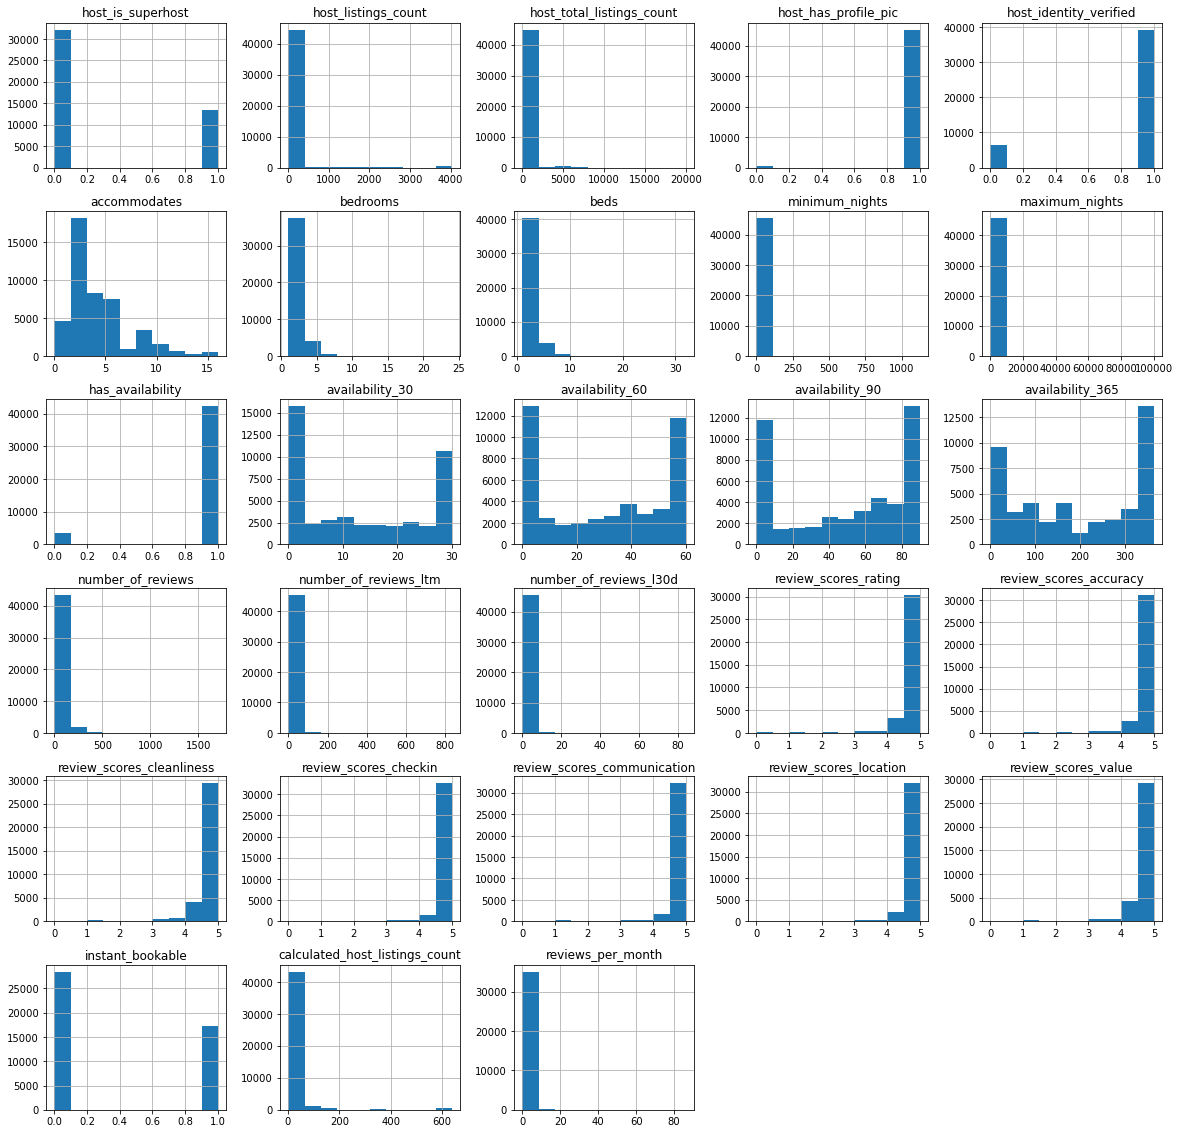

In [132]:
cat_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 
            'has_availability', 'instant_bookable']

# Replacing cat columns with f/t with 0/1
df[cat_cols] = df[cat_cols].replace({'f': 0, 't': 1})

# Plotting the distribution of numerical and boolean categories
df.hist(figsize=(20, 20))

## Cleaning host attributes

In [133]:
# extract host attributes
host_attr = df.columns[df.columns.str.startswith('host')]
print(host_attr)

Index(['host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified'],
      dtype='object')


In [134]:
host_df = df[host_attr]
host_df.head()

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified
id,,,,,,,,,
183319,2011-07-25,within a day,100%,100%,0.0,2.0,3.0,1.0,0.0
51307,2010-09-15,NaN,NaN,NaN,0.0,2.0,2.0,1.0,1.0
184314,2011-07-28,NaN,NaN,NaN,0.0,2.0,2.0,1.0,1.0
51498,2010-09-16,within an hour,100%,88%,0.0,1.0,2.0,1.0,1.0
109,2008-06-27,NaN,NaN,NaN,0.0,1.0,3.0,1.0,1.0


### Check dtypes

In [135]:
host_df.dtypes

host_since                    object
host_response_time            object
host_response_rate            object
host_acceptance_rate          object
host_is_superhost            float64
host_listings_count          float64
host_total_listings_count    float64
host_has_profile_pic         float64
host_identity_verified       float64
dtype: object

### Calculate host age

Host's age is calculated using the date the data was scraped. We think that the most experienced hosts may still get an extra edge on their listings and may keep price a little higher than relatively new hosts.

In [136]:
# host age
host_df['host_since'] = (datetime(2022, 9, 10) - pd.to_datetime(host_df['host_since'])).dt.days

# mean and median
print('Mean days as host: %.2f' %round(host_df['host_since'].mean(), 2))
print('Median days as host: %.2f' %host_df['host_since'].median())

# Replacing null values with the median
host_df['host_since'] = host_df['host_since'].fillna(host_df['host_since'].median())

Mean days as host: 2069.77
Median days as host: 2152.00


### host_response_time

Because host_response_time is unknown for 19.4% listings, it will be retained as its own category, 'unknown'.

In [137]:
print('Null values: %d' %host_df['host_response_time'].isna().sum())
print('Proportion: %.2f' %round((host_df['host_response_time'].isna().sum()/len(host_df))*100, 1))

Null values: 8880
Proportion: 19.40


In [138]:
host_df['host_response_time'] = host_df['host_response_time'].fillna('unknown')
host_df['host_response_time'].value_counts(normalize=True)

within an hour        0.613183
unknown               0.193823
within a few hours    0.120288
within a day          0.056423
a few days or more    0.016283
Name: host_response_time, dtype: float64

### host_response_rate

host response rate is converted into bins.

In [139]:
# Removing the % sign from the host_response_rate string and converting to an integer
host_df['host_response_rate'] = host_df['host_response_rate'].str[:-1].astype('float64')

print('Mean host response rate: %.2f' %round(host_df['host_response_rate'].mean(), 2))
print('Median host response rate: %.2f' %host_df['host_response_rate'].median())

Mean host response rate: 95.78
Median host response rate: 100.00


In [140]:
# Bin into four categories
host_df['host_response_rate'] = pd.cut(host_df['host_response_rate'], 
                                       bins=[0, 50, 75, 90, 100], 
                                       labels=['0-49%', '50-74%', '75-89%', '90-100%'], 
                                       include_lowest=True)

# Converting to string
host_df['host_response_rate'] = host_df['host_response_rate'].astype('str')

# Replace nulls with 'unknown'
host_df['host_response_rate'] = host_df['host_response_rate'].fillna('unknown')

# Category counts
host_df['host_response_rate'].value_counts()

90-100%    32595
unknown     8880
75-89%      2497
0-49%        946
50-74%       897
Name: host_response_rate, dtype: int64

### host_acceptance_rate

Host acceptance rate is also converted into categorical variable using binning and the missing is retained as it's own category 'unknown'

In [141]:
# Removing the % sign from the host_response_rate string and converting to an integer
host_df['host_acceptance_rate'] = host_df['host_acceptance_rate'].str[:-1].astype('float64')

print('Mean host acceptance rate: %.2f' %round(host_df['host_acceptance_rate'].mean(), 2))
print('Median host acceptance rate: %.2f' %host_df['host_acceptance_rate'].median())

Mean host acceptance rate: 87.27
Median host acceptance rate: 98.00


In [142]:
# Bin into four categories
host_df['host_acceptance_rate'] = pd.cut(host_df['host_acceptance_rate'], 
                                       bins=[0, 50, 75, 90, 100], 
                                       labels=['0-49%', '50-74%', '75-89%', '90-100%'], 
                                       include_lowest=True)

# Converting to string
host_df['host_acceptance_rate'] = host_df['host_acceptance_rate'].astype('str')

# Replace nulls with 'unknown'
host_df['host_acceptance_rate'] = host_df['host_acceptance_rate'].fillna('unknown')

# Category counts
host_df['host_acceptance_rate'].value_counts()

90-100%    26462
unknown     7968
75-89%      4987
0-49%       3295
50-74%      3103
Name: host_acceptance_rate, dtype: int64

### Remaining NaNs

After all these preprocessing steps, host_is_superhost attribute contains most(98) missing data points. These data rows will be removed since it's a small proportion of data. 

In [143]:
host_df.isna().sum()

host_since                    0
host_response_time            0
host_response_rate            0
host_acceptance_rate          0
host_is_superhost            98
host_listings_count          13
host_total_listings_count    13
host_has_profile_pic         13
host_identity_verified       13
dtype: int64

In [144]:
host_df = host_df.dropna()
host_df.shape

(45704, 9)

## Cleaning reviews attributes

In [145]:
# extract review attributes
review_attr = df.columns[df.columns.str.contains('review')]
print(review_attr)

Index(['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month'],
      dtype='object')


In [146]:
review_df = df[review_attr]
review_df.head()

,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
id,,,,,,,,,,,,,
183319,3,0,0,2012-03-11,2019-02-25,5.00,4.67,4.67,5.00,5.00,5.00,5.00,0.02
51307,138,0,0,2011-02-12,2020-12-13,4.64,4.77,4.55,4.89,4.85,4.95,4.76,0.98
184314,30,0,0,2011-09-05,2017-12-24,4.88,4.93,4.63,4.78,4.93,4.89,4.85,0.22
51498,378,41,2,2010-10-03,2022-08-21,4.73,4.83,4.80,4.94,4.90,4.83,4.74,2.60
109,2,0,0,2011-08-15,2016-05-15,4.00,5.00,5.00,3.00,4.00,5.00,4.00,0.01


In [147]:
review_df.dtypes

number_of_reviews                int64
number_of_reviews_ltm            int64
number_of_reviews_l30d           int64
first_review                    object
last_review                     object
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
reviews_per_month              float64
dtype: object

Missing data in reviews related attributes is enormous. Specially, in review_scores where almost a quarter of data points are missing. This is too large a proportion of the dataset to drop, and dropping the columns would lose a lot of useful information - reviews are very important in people's decisions to book, and therefore price. This is also too large a proportion of the dataset to simply replace with median/mean values, as this would skew the distribution substantially.

Also, the missing values here are not really missing values - it tells us that these are new or previously unbooked listings that have not had reviews yet. In order to make the resulting model workable to predict prices for any Airbnb listing, including brand new listings, is is actually beneficial to keep them in. Therefore, these will be kept as an 'unknown' category, and the feature will have to be treated as categorical (and therefore one-hot encoded) rather than numerical.

In [148]:
review_df.isna().sum()

number_of_reviews                  0
number_of_reviews_ltm              0
number_of_reviews_l30d             0
first_review                   10579
last_review                    10579
review_scores_rating           10579
review_scores_accuracy         10848
review_scores_cleanliness      10847
review_scores_checkin          10854
review_scores_communication    10848
review_scores_location         10857
review_scores_value            10858
reviews_per_month              10579
dtype: int64

### Age of first review, last review

In [149]:
# Convert first/last review columns to datetime
review_df['first_review'] = pd.to_datetime(review_df['first_review'])
review_df['last_review'] = pd.to_datetime(review_df['last_review'])

# Calculating the number of days between the first/last review and the date the data was scraped
review_df['first_review_days_ago'] = (datetime(2022, 9, 10) - review_df['first_review']).dt.days
review_df['last_review_days_ago'] = (datetime(2022, 9, 10) - review_df['last_review']).dt.days

review_df = review_df.drop(columns=['first_review', 'last_review'])

<AxesSubplot:>

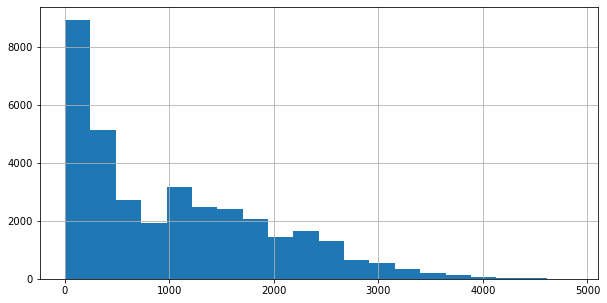

In [150]:
# Distribution of the number of days since first review
review_df.first_review_days_ago.hist(figsize=(10, 5), bins=20)

In [151]:
def bin_column(df, col, bins, labels, na_label='unknown'):
    """
    Takes in a column name, bin cut points and labels, replaces the original column with a
    binned version, and replaces nulls (with 'unknown' if unspecified).
    """
    df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    df[col] = df[col].astype('str')
    df[col].fillna(na_label, inplace=True)

In [152]:
# Binning time since first review
bin_column(review_df, 'first_review_days_ago',
           bins=[0, 182, 365, 730, 1460, max(review_df['first_review_days_ago'])],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'],
           na_label='no_reviews')

<AxesSubplot:>

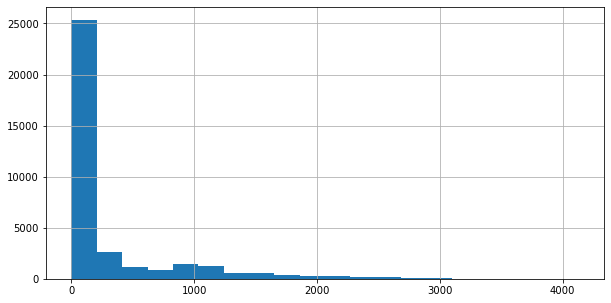

In [153]:
# Distribution of the number of days since first review
review_df.last_review_days_ago.hist(figsize=(10, 5), bins=20)

In [154]:
# Binning time since last review
bin_column(review_df, 'last_review_days_ago',
           bins=[0, 14, 60, 182, 365, max(review_df['last_review_days_ago'])],
           labels=['0-2 weeks',
                   '2-8 weeks',
                   '2-6 months',
                   '6-12 months',
                   '1+ year'],
           na_label='no_reviews')

### Preprocessing of review rating columns

As above, listings without reviews will be kept and replaced with 'unknown'. Other ratings will be grouped into bins. The histograms below were produced in order to decide on useful bins. The majority of ratings are 9 or 10 out of 10, as also seen in the value count below. Therefore for these columns, 9/10 and 10/10 will be kept as separate groups, and 1-8/10 will be binned together (as this is, by Airbnb standards, a 'low' rating).

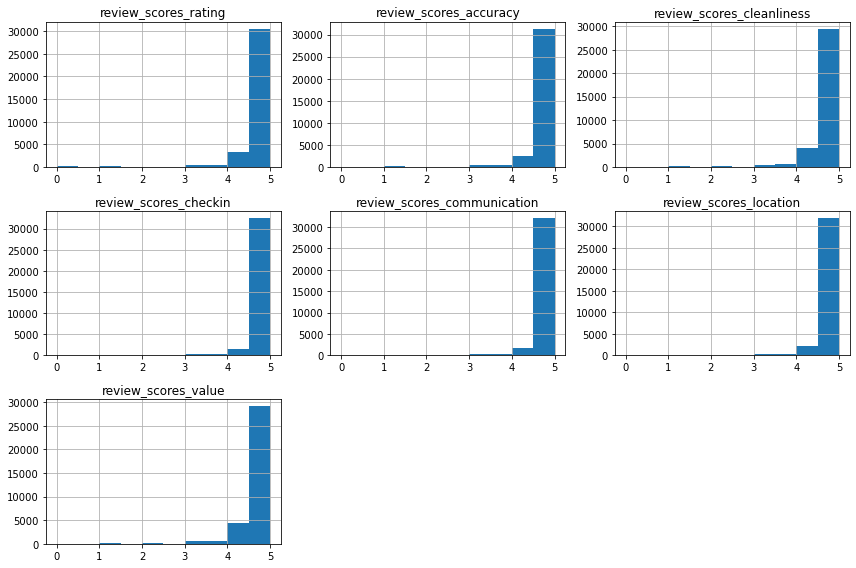

In [155]:
# Checking the distributions of the review ratings columns
variables_to_plot = list(df.columns[df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [156]:
# Binning for all columns scored out of 10
for col in variables_to_plot:
    bin_column(review_df, col,
               bins=[0, 8, 9, 10],
               labels=['0-8/10', '9/10', '10/10'],
               na_label='no_reviews')

In [157]:
review_df.isna().sum()

number_of_reviews                  0
number_of_reviews_ltm              0
number_of_reviews_l30d             0
review_scores_rating               0
review_scores_accuracy             0
review_scores_cleanliness          0
review_scores_checkin              0
review_scores_communication        0
review_scores_location             0
review_scores_value                0
reviews_per_month              10579
first_review_days_ago              0
last_review_days_ago               0
dtype: int64

### reviews_per_month

<AxesSubplot:>

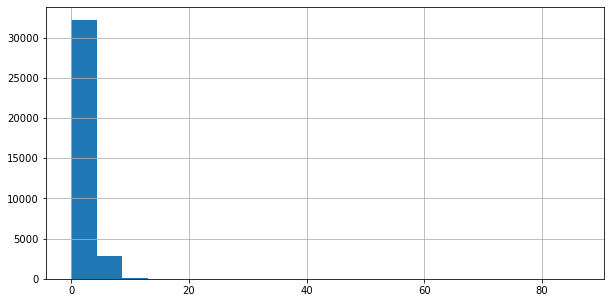

In [158]:
review_df['reviews_per_month'].hist(figsize=(10, 5), bins=20)

In [159]:
review_df['reviews_per_month'].max(), review_df['reviews_per_month'].min()

(86.21, 0.01)

In [160]:
# Binning for all columns scored out of 10
bin_column(review_df, 'reviews_per_month',
           bins=[0, 1, 5, 10, 100],
           labels=['0-1/100', '2-5/100', '5-10/100', '10+/100'],
           na_label='no_reviews')

In [161]:
review_df

,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,first_review_days_ago,last_review_days_ago
id,,,,,,,,,,,,,
183319,3,0,0,0-8/10,0-8/10,0-8/10,0-8/10,0-8/10,0-8/10,0-8/10,0-1/100,4+ years,1+ year
51307,138,0,0,0-8/10,0-8/10,0-8/10,0-8/10,0-8/10,0-8/10,0-8/10,0-1/100,4+ years,1+ year
184314,30,0,0,0-8/10,0-8/10,0-8/10,0-8/10,0-8/10,0-8/10,0-8/10,0-1/100,4+ years,1+ year
51498,378,41,2,0-8/10,0-8/10,0-8/10,0-8/10,0-8/10,0-8/10,0-8/10,2-5/100,4+ years,2-8 weeks
109,2,0,0,0-8/10,0-8/10,0-8/10,0-8/10,0-8/10,0-8/10,0-8/10,0-1/100,4+ years,1+ year
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26665862,109,22,0,0-8/10,0-8/10,0-8/10,0-8/10,0-8/10,0-8/10,0-8/10,2-5/100,4+ years,2-8 weeks
26898605,142,42,0,0-8/10,0-8/10,0-8/10,0-8/10,0-8/10,0-8/10,0-8/10,2-5/100,4+ years,2-8 weeks
26895703,209,33,2,0-8/10,0-8/10,0-8/10,0-8/10,0-8/10,0-8/10,0-8/10,2-5/100,4+ years,2-8 weeks


### Clean remaining attributes

In [162]:
rest_attr = set(df.columns) - set(host_attr) - set(review_attr)
rest_attr

{'accommodates',
 'amenities',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'calculated_host_listings_count',
 'has_availability',
 'instant_bookable',
 'maximum_nights',
 'minimum_nights',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'price',
 'property_type',
 'room_type'}

### Preprocess availability features

There're multiple availability related features in the dataset and they'll be highly correlatted with each other so we're gonna drop them all except availability_30 which shows availability in next 30 days

In [163]:
avail_cols_to_drop = ['availability_60', 'availability_90', 'availability_365']
df = df.drop(columns=avail_cols_to_drop)

### property type

In [164]:
df['property_type'].value_counts()

Entire home                           10647
Entire rental unit                    10331
Private room in home                   6182
Entire condo                           2841
Entire guesthouse                      2316
Private room in rental unit            2126
Entire guest suite                     1494
Entire villa                           1113
Entire townhouse                       1083
Private room in condo                   671
Entire bungalow                         642
Entire serviced apartment               634
Private room in townhouse               568
Entire loft                             525
Shared room in home                     426
Private room in villa                   417
Room in boutique hotel                  395
Room in hotel                           366
Private room in guest suite             366
Entire cottage                          291
Shared room in rental unit              238
Private room in bungalow                219
Entire vacation home            

In [165]:
# Replacing categories that are types of houses, hotel or apartments
df.property_type.replace(
    {
        'Entire rental unit': 'House',
        'Entire vacation home': 'House',
        'Tiny home': 'House',
        'Entire place': 'House',
        'Entire home': 'House',
        'Entire rental unit': 'House',
        'Private room in home': 'House',
        'Entire condo': 'Apartment',
        'Entire guesthouse': 'Hotel',
        'Private room in rental unit': 'House',
        'Entire guest suite': 'Hotel',
        'Entire villa': 'House',
        'Entire townhouse': 'Apartment',
        'Private room in condo': 'Apartment',
        'Entire bungalow': 'House',
        'Entire serviced apartment': 'Apartment',
        'Private room in townhouse': 'Apartment',
        'Entire loft': 'Apartment',
        'Shared room in home': 'House',
        'Private room in villa': 'House',
        'Room in boutique hotel': 'Hotel',
        'Private room in guest suite': 'Hotel',
        'Room in hotel': 'Hotel',
        'Entire cottage': 'House',
        'Shared room in rental unit': 'House',
        'Private room in bungalow': 'House',
        'Entire vacation home': 'House',
        'Private room in bed and breakfast': 'Hotel',
        'Private room in guesthouse': 'Hotel',
        'Room in aparthotel': 'Hotel',
        'Private room in resort': 'Hotel',
        'Tiny home': 'House',
        'Entire place': 'House',
        'Entire cabin': 'House',
        'Private room in loft': 'Apartment',
        'Private room': 'House',
        'Private room in serviced apartment': 'Apartment',
        'Shared room in condo': 'Apartment',
        'Private room in casa particular': 'House',
        'Shared room in guest suite': 'Hotel',
        'Private room in cottage': 'House',
        'Shared room in villa': 'House',
        'Private room in tiny home': 'House',
        'Shared room in guesthouse': 'Apartment'
    }, inplace=True)

In [166]:
# Replacing all other remaining categories with 'other'
df.loc[~df.property_type.isin(['House', 'Apartment', 'Hotel']), 'property_type'] = 'Other'

In [167]:
df.property_type.value_counts()

House        33210
Apartment     6458
Hotel         5481
Other          666
Name: property_type, dtype: int64

### bedrooms and beds

In [168]:
df[['bedrooms', 'beds']].isna().sum()

bedrooms    3760
beds         794
dtype: int64

Missing values will be replaced with the median (to avoid strange fractions).

In [169]:
median_bedrooms = df['bedrooms'].median()
df['bedrooms'] = df['bedrooms'].fillna(median_bedrooms)
print('Median bedrooms: %d' %median_bedrooms)

median_beds = df['beds'].median()
df['beds'] = df['beds'].fillna(median_beds)
print('Median beds: %d' %median_beds)

Median bedrooms: 1
Median beds: 2


### room_type

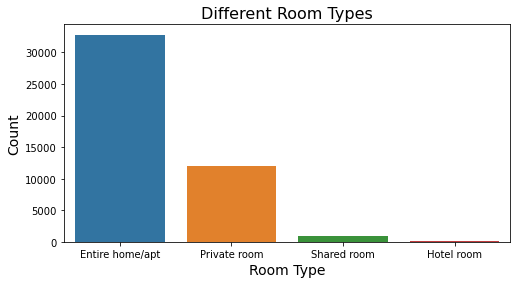

In [170]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x='room_type', data=df, ax=ax)
ax.set_xlabel('Room Type', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Different Room Types', fontsize=16)
plt.show()

### amenities

Amenities is a free form text field and contains a lot of different things which are present/available at the BnB like beach view, Air Conditioning, HD TV etc. It's a bit difficult to include all these amenities in our model since it's a very huge list. We decided to pick some important category of amenities which could potentially affect the price of a listing.

In [171]:
# sample amenties text
df['amenities'][183319]

'["Bed linens", "Heating", "Dishes and silverware", "Extra pillows and blankets", "Smoke alarm", "TV", "Hot water", "Cooking basics", "Coffee maker", "Hangers", "Stove", "Patio or balcony", "Wifi", "Iron", "Oven", "Kitchen", "Long term stays allowed", "Microwave", "Free street parking", "Fire extinguisher", "Refrigerator", "Bathtub"]'

Creating a big set of all amenities present in this attribute. From that set, we could gradually choose to include the most important ones with their different values.

In [172]:
# Creating a set of all possible amenities
amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('[', '')
amenities_list_string = amenities_list_string.replace(']', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'',
 'Samsung stainless steel stove',
 'Beekman 1801 shampoo',
 'Free residential garage on premises \\u2013 1 space',
 'Galanz - frig and freezer  & Extra space for additional frig and freezer in Garage/washer & dryer area refrigerator',
 'Pantene ProV or Equivalent shampoo',
 'Hair care conditioner',
 'Sears stainless steel oven',
 'Shared fenced garden or backyard',
 '364 from wholefoods conditioner',
 'Coconut shampoo',
 'Picnic portable electric stove',
 'Apple TV',
 'Oley body soap',
 'Whole Foods body soap',
 'Neutrogena',
 'Color Safe',
 'Kitchen Aid  stainless steel gas stove',
 'Baby safety gates',
 'Fast wifi \\u2013 448 Mbps',
 'Refillable and Sustainable body soap',
 'Beverage cooler. Minimum temp. 46 degrees.  refrigerator',
 'Moroccan Oil Hydrating Shampoo shampoo',
 'Frigidaire stainless steel electric stove',
 'Fast wifi \\u2013 199 Mbps',
 'Mosquito net',
 'ECO BOTANICS body soap',
 'VO5 shampoo',
 'Whole Foods 365 Shower Gel (No animal ingredients',
 'Green Tea  bod

Create list of various values in amenities for Kitchen, TV/Sound System, Refrigerator, Wifi, Bath Accessories, Pool/Hot tub/Sauna and Parking. All these different values will be replaced with their corresponding names and later new features will be created based upon that.

In [173]:
tv_sound_system_list = []
kitchen_list = []
refrigerator_list = []
wifi_list = []
bath_accessories_list = []
pool_list = []
parking_list = []

for entry in amenities_set:
    if 'tv' in entry.lower() or 'sound system' in entry.lower():
        tv_sound_system_list.append(entry)
    elif 'oven' in entry.lower() or 'stove' in entry.lower():
        kitchen_list.append(entry)
    elif 'refrigerator' in entry.lower():
        refrigerator_list.append(entry)
    elif 'wifi' in entry.lower():
        wifi_list.append(entry)
    elif 'soap' in entry.lower() or 'shampo' in entry.lower() or 'conditioner' in entry.lower():
        bath_accessories_list.append(entry)
    elif 'pool' in entry.lower():
        pool_list.append(entry)
    elif 'parking' in entry.lower():
        parking_list.append(entry)

In [174]:
amenities_set = amenities_set - set(tv_sound_system_list) - set(kitchen_list) - set(refrigerator_list) - set(wifi_list) - set(bath_accessories_list) - set(pool_list) - set(parking_list)
amenities_set.update(['TV_Sound_System', 'Kitchen', 'Refrigerator', 'Wifi', 'Bath_Accessories', 'Pool', 'Parking'])
amenities_set

{'',
 '1 hot plate',
 '100% Vegan',
 '100% Vegan & Cruelty-Free',
 '100% Vegan. Contains UV-protective properties. Sulfate',
 '100% Vegan. Sulfate',
 '100% Vegan:  Sulfate',
 '2 units: Yamaha Home Theater',
 '2-5 years old',
 '24-hour fitness center',
 '3 Stationary SONOS speakers',
 '5-10 years old',
 'AC - split type ductless system',
 'AND BAR WITH BARSTOOLS',
 'Acure',
 'Aesop',
 'Air conditioning',
 'Air fryer',
 'Air hockey table',
 'AirPlay',
 'Airport shuttle',
 'Alarm system',
 'Alexa smart speakers in kitchen',
 'Alfresco shower',
 'All Natural',
 'All inclusive',
 'Amazon Echo',
 'Amazon Prime Video',
 'Apple\\u00ae AirPlay\\u00ae',
 'Arcade machine',
 'Argan',
 'Arm & Hammer',
 'Art studio',
 'Attitude',
 'Avalon Organics',
 'Aveeno',
 'Axe',
 'B5',
 'BBQ grill',
 'BBS Sound Maximizer',
 'BERGMAN KELLY Tropical Waterfall',
 'BOSCH FRENCH DOOR',
 'Baby bath',
 'Baby equipment',
 'Baby monitor',
 'Baby safety gates',
 'Babysitter recommendations',
 'Backyard',
 'Baking sheet'

Create new features for TV/Sound System, Kitchen, Internet, Bath Accessories, Pool/Sauna and Parking

In [175]:
df['amenities'] = df['amenities'].str.lower()
df.loc[df['amenities'].str.contains('tv|sound system|speaker'), 'tv_sound_system'] = 1
df.loc[df['amenities'].str.contains('oven|stove|refrigerator'), 'kitchen'] = 1
df.loc[df['amenities'].str.contains('wifi|internet'), 'internet'] = 1
df.loc[df['amenities'].str.contains('soap|shampo|conditioner|bathrobe'), 'bath_acc'] = 1
df.loc[df['amenities'].str.contains('pool|sauna|hot-tub| hot tub'), 'pool_sauna'] = 1
df.loc[df['amenities'].str.contains('parking'), 'parking'] = 1
df.loc[df['amenities'].str.contains('children|baby|crib'), 'children_friendly'] = 1
df.loc[df['amenities'].str.contains('waterfall|beach|nature'), 'nature'] = 1
df.loc[df['amenities'].str.contains('air conditioning|central air conditioning'), 'air_conditioning'] = 1
df.loc[df['amenities'].str.contains('wardrobe|walk-in closet|dresser|closet'), 'wardrobe'] = 1
df.loc[df['amenities'].str.contains('game'), 'gaming'] = 1
df.loc[df['amenities'].str.contains('gym'), 'gym'] = 1

In [176]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = ['tv_sound_system', 'kitchen', 'internet', 'bath_acc', 
                         'pool_sauna', 'parking', 'children_friendly', 'nature',
                         'air_conditioning', 'wardrobe', 'gaming', 'gym']
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

# Dropping the original amenity feature
df.drop('amenities', axis=1, inplace=True)

## Bathrooms_text attribute

Bathrooms_text attribute is important per our understanding since the availability of a private/shared bathroom is gonna impact the property price by a huge means. This attribute contains two things: no of bathrooms available at the property as well as the type of bathrooms.

We extracted this information and created two separate attributes: 
   1. num_bath: number of bathrooms available on the property
   2. bathroom_type: private or shared

In [177]:
df['bathrooms_text'].unique()

array(['1 bath', '2 baths', '1 shared bath', '1 private bath',
       '2.5 baths', '1.5 baths', '3 baths', nan, '1.5 shared baths',
       '2 shared baths', '11 shared baths', '3.5 baths', '4 baths',
       '8 shared baths', '8 baths', '0 shared baths', '8.5 shared baths',
       '2.5 shared baths', '0 baths', '4.5 baths', '3.5 shared baths',
       '5 baths', '3 shared baths', '11.5 shared baths', '6.5 baths',
       '4.5 shared baths', 'Half-bath', '7.5 baths', '5.5 baths',
       'Shared half-bath', '8.5 baths', '5 shared baths',
       'Private half-bath', '6 baths', '7 baths', '9 baths',
       '4 shared baths', '12.5 baths', '10 baths', '9.5 baths',
       '11.5 baths', '13 baths', '11 baths', '5.5 shared baths',
       '13.5 baths', '25 baths', '12 baths', '15.5 baths', '10.5 baths',
       '21 baths', '15 baths', '6 shared baths'], dtype=object)

In [178]:
# bathrooms_text
df['bathrooms_text'] = df['bathrooms_text'].astype(str)

In [179]:
import re
def get_num_baths(bathroom_text):
    if bathroom_text is np.nan:
        return np.nan
    else:
        num_baths = re.search('^\d\S*\S*\S*', bathroom_text)
        if num_baths is None:
            num_baths = 0
        else:
            num_baths = num_baths.group()
        return float(num_baths)

In [180]:
def get_bath_type(bathroom_text):
    if bathroom_text is np.nan:
        return np.nan
    else:
        if 'shared' in bathroom_text.lower(): 
            bath_type = 'shared'
        else:
            bath_type = 'private'
        return bath_type

In [181]:
df['num_bathrooms'] = df['bathrooms_text'].apply(get_num_baths)
df['bathroom_type'] = df['bathrooms_text'].apply(get_bath_type)
df = df.drop(columns='bathrooms_text')
df.head()

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,tv_sound_system,kitchen,internet,bath_acc,pool_sauna,parking,children_friendly,nature,air_conditioning,wardrobe,gaming,gym,num_bathrooms,bathroom_type
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
183319,2011-07-25,within a day,100%,100%,0.0,2.0,3.0,1.0,0.0,Venice,City of Los Angeles,House,Entire home/apt,2,2.0,2.0,$152.00,30,90,1,0,3,0,0,2012-03-11,2019-02-25,5.00,4.67,4.67,5.00,5.00,5.00,5.00,0,2,0.02,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,private
51307,2010-09-15,NaN,NaN,NaN,0.0,2.0,2.0,1.0,1.0,Atwater Village,City of Los Angeles,House,Entire home/apt,2,1.0,1.0,$75.00,30,365,1,0,138,0,0,2011-02-12,2020-12-13,4.64,4.77,4.55,4.89,4.85,4.95,4.76,0,2,0.98,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,private
184314,2011-07-28,NaN,NaN,NaN,0.0,2.0,2.0,1.0,1.0,Venice,City of Los Angeles,House,Entire home/apt,1,1.0,1.0,$125.00,30,30,1,0,30,0,0,2011-09-05,2017-12-24,4.88,4.93,4.63,4.78,4.93,4.89,4.85,1,1,0.22,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,private
51498,2010-09-16,within an hour,100%,88%,0.0,1.0,2.0,1.0,1.0,Mar Vista,City of Los Angeles,Hotel,Entire home/apt,2,1.0,1.0,$189.00,3,365,1,13,378,41,2,2010-10-03,2022-08-21,4.73,4.83,4.80,4.94,4.90,4.83,4.74,0,1,2.60,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,private
109,2008-06-27,NaN,NaN,NaN,0.0,1.0,3.0,1.0,1.0,Culver City,Other Cities,Apartment,Entire home/apt,6,2.0,3.0,$115.00,30,730,1,0,2,0,0,2011-08-15,2016-05-15,4.00,5.00,5.00,3.00,4.00,5.00,4.00,0,1,0.01,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,private


### Cleaning price attribute

Price is an important attribute since it's gonna be our target variable for later modelling purpose. We removed dollar prefix as well as the comma(,) from this attribute and finally converted it to float.

In [182]:
df['price'] = df['price'].str[1:-3]
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype('int64')

In [183]:
df.head()

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,tv_sound_system,kitchen,internet,bath_acc,pool_sauna,parking,children_friendly,nature,air_conditioning,wardrobe,gaming,gym,num_bathrooms,bathroom_type
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
183319,2011-07-25,within a day,100%,100%,0.0,2.0,3.0,1.0,0.0,Venice,City of Los Angeles,House,Entire home/apt,2,2.0,2.0,152,30,90,1,0,3,0,0,2012-03-11,2019-02-25,5.00,4.67,4.67,5.00,5.00,5.00,5.00,0,2,0.02,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,private
51307,2010-09-15,NaN,NaN,NaN,0.0,2.0,2.0,1.0,1.0,Atwater Village,City of Los Angeles,House,Entire home/apt,2,1.0,1.0,75,30,365,1,0,138,0,0,2011-02-12,2020-12-13,4.64,4.77,4.55,4.89,4.85,4.95,4.76,0,2,0.98,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,private
184314,2011-07-28,NaN,NaN,NaN,0.0,2.0,2.0,1.0,1.0,Venice,City of Los Angeles,House,Entire home/apt,1,1.0,1.0,125,30,30,1,0,30,0,0,2011-09-05,2017-12-24,4.88,4.93,4.63,4.78,4.93,4.89,4.85,1,1,0.22,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,private
51498,2010-09-16,within an hour,100%,88%,0.0,1.0,2.0,1.0,1.0,Mar Vista,City of Los Angeles,Hotel,Entire home/apt,2,1.0,1.0,189,3,365,1,13,378,41,2,2010-10-03,2022-08-21,4.73,4.83,4.80,4.94,4.90,4.83,4.74,0,1,2.60,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,private
109,2008-06-27,NaN,NaN,NaN,0.0,1.0,3.0,1.0,1.0,Culver City,Other Cities,Apartment,Entire home/apt,6,2.0,3.0,115,30,730,1,0,2,0,0,2011-08-15,2016-05-15,4.00,5.00,5.00,3.00,4.00,5.00,4.00,0,1,0.01,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,private


In [184]:
host_df.shape

(45704, 9)

In [185]:
review_df.shape

(45815, 13)

In [186]:
df['neighbourhood_group_cleansed'].value_counts()

City of Los Angeles     19501
Other Cities            14849
Unincorporated Areas     3576
Name: neighbourhood_group_cleansed, dtype: int64

In [187]:
df['neighbourhood_group_cleansed'] = df['neighbourhood_group_cleansed'].fillna('Unknown')

In [188]:
df1 = df[set(df.columns) - set(host_attr) - set(review_attr)].copy()
data_df = pd.concat([df1, host_df, review_df], axis=1).dropna()

In [189]:
data_df.shape

(45704, 50)

## One-hot encode 

In [190]:
df2 = pd.get_dummies(data_df)
df2.head()

,num_bathrooms,gaming,availability_30,instant_bookable,gym,air_conditioning,bedrooms,calculated_host_listings_count,tv_sound_system,pool_sauna,parking,has_availability,nature,bath_acc,wardrobe,maximum_nights,kitchen,children_friendly,minimum_nights,beds,internet,price,accommodates,host_since,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,neighbourhood_group_cleansed_City of Los Angeles,neighbourhood_group_cleansed_Other Cities,neighbourhood_group_cleansed_Unincorporated Areas,neighbourhood_group_cleansed_Unknown,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bathroom_type_private,bathroom_type_shared,neighbourhood_cleansed_Acton,neighbourhood_cleansed_Adams-Normandie,neighbourhood_cleansed_Agoura Hills,neighbourhood_cleansed_Agua Dulce,neighbourhood_cleansed_Alhambra,neighbourhood_cleansed_Aliso Viejo,neighbourhood_cleansed_Aliso and Wood Regional Park,neighbourhood_cleansed_Alondra Park,neighbourhood_cleansed_Altadena,neighbourhood_cleansed_Anaheim,neighbourhood_cleansed_Angeles Crest,neighbourhood_cleansed_Arcadia,neighbourhood_cleansed_Arleta,neighbourhood_cleansed_Arlington Heights,neighbourhood_cleansed_Artesia,neighbourhood_cleansed_Athens,neighbourhood_cleansed_Atwater Village,neighbourhood_cleansed_Avalon,neighbourhood_cleansed_Avocado Heights,neighbourhood_cleansed_Azusa,neighbourhood_cleansed_Baldwin Hills/Crenshaw,neighbourhood_cleansed_Baldwin Park,neighbourhood_cleansed_Bel-Air,neighbourhood_cleansed_Bell,neighbourhood_cleansed_Bell Gardens,neighbourhood_cleansed_Bellflower,neighbourhood_cleansed_Beverly Crest,neighbourhood_cleansed_Beverly Grove,neighbourhood_cleansed_Beverly Hills,neighbourhood_cleansed_Beverlywood,neighbourhood_cleansed_Boyle Heights,neighbourhood_cleansed_Brea,neighbourhood_cleansed_Brentwood,neighbourhood_cleansed_Broadway-Manchester,neighbourhood_cleansed_Buena Park,neighbourhood_cleansed_Burbank,neighbourhood_cleansed_Calabasas,neighbourhood_cleansed_Canoga Park,neighbourhood_cleansed_Carson,neighbourhood_cleansed_Carthay,neighbourhood_cleansed_Castaic,neighbourhood_cleansed_Castaic Canyons,neighbourhood_cleansed_Central-Alameda,neighbourhood_cleansed_Century City,neighbourhood_cleansed_Cerritos,neighbourhood_cleansed_Charter Oak,neighbourhood_cleansed_Chatsworth,neighbourhood_cleansed_Chatsworth Reservoir,neighbourhood_cleansed_Chesterfield Square,neighbourhood_cleansed_Cheviot Hills,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Citrus,neighbourhood_cleansed_Claremont,neighbourhood_cleansed_Cleveland National Forest,neighbourhood_cleansed_Commerce,neighbourhood_cleansed_Compton,neighbourhood_cleansed_Costa Mesa,neighbourhood_cleansed_Covina,...,neighbourhood_cleansed_Topanga,neighbourhood_cleansed_Torrance,neighbourhood_cleansed_Tujunga,neighbourhood_cleansed_Tujunga Canyons,neighbourhood_cleansed_Tustin,neighbourhood_cleansed_Unincorporated Catalina Island,neighbourhood_cleansed_Unincorporated Santa Monica Mountains,neighbourhood_cleansed_Unincorporated Santa Susana Mountains,neighbourhood_cleansed_Universal City,neighbourhood_cleansed_University Park,neighbourhood_cleansed_Val Verde,neighbourhood_cleansed_Valinda,neighbourhood_cleansed_Valley Glen,neighbourhood_cleansed_Valley Village,neighbourhood_cleansed_Van Nuys,neighbourhood_cleansed_Venice,neighbourhood_cleansed_Vermont Knolls,neighbourhood_cleansed_Vermont Square,neighbourhood_cleansed_Vermont Vista,neighbourhood_cleansed_Vermont-Slauson,neighbourhood_cleansed_Vernon,neighbourhood_cleansed_Veterans Administration,neighbourhood_cleansed_View Park-Windsor Hills,neighbourhood_cleansed_Villa Park,neighbourhood_cleansed_Vincent,neighbourhood_cleansed_Walnut,neighbourhood_cleansed_Walnut Park,neighbourhood_cleansed_Watts,neighbourhood_cleansed_West Adams,neighbourhood_cleansed_West Carson,neighbourhood_cleansed_West Compton,neighbourhood_cleansed_West Covina,ne

### Multi-collinearity check

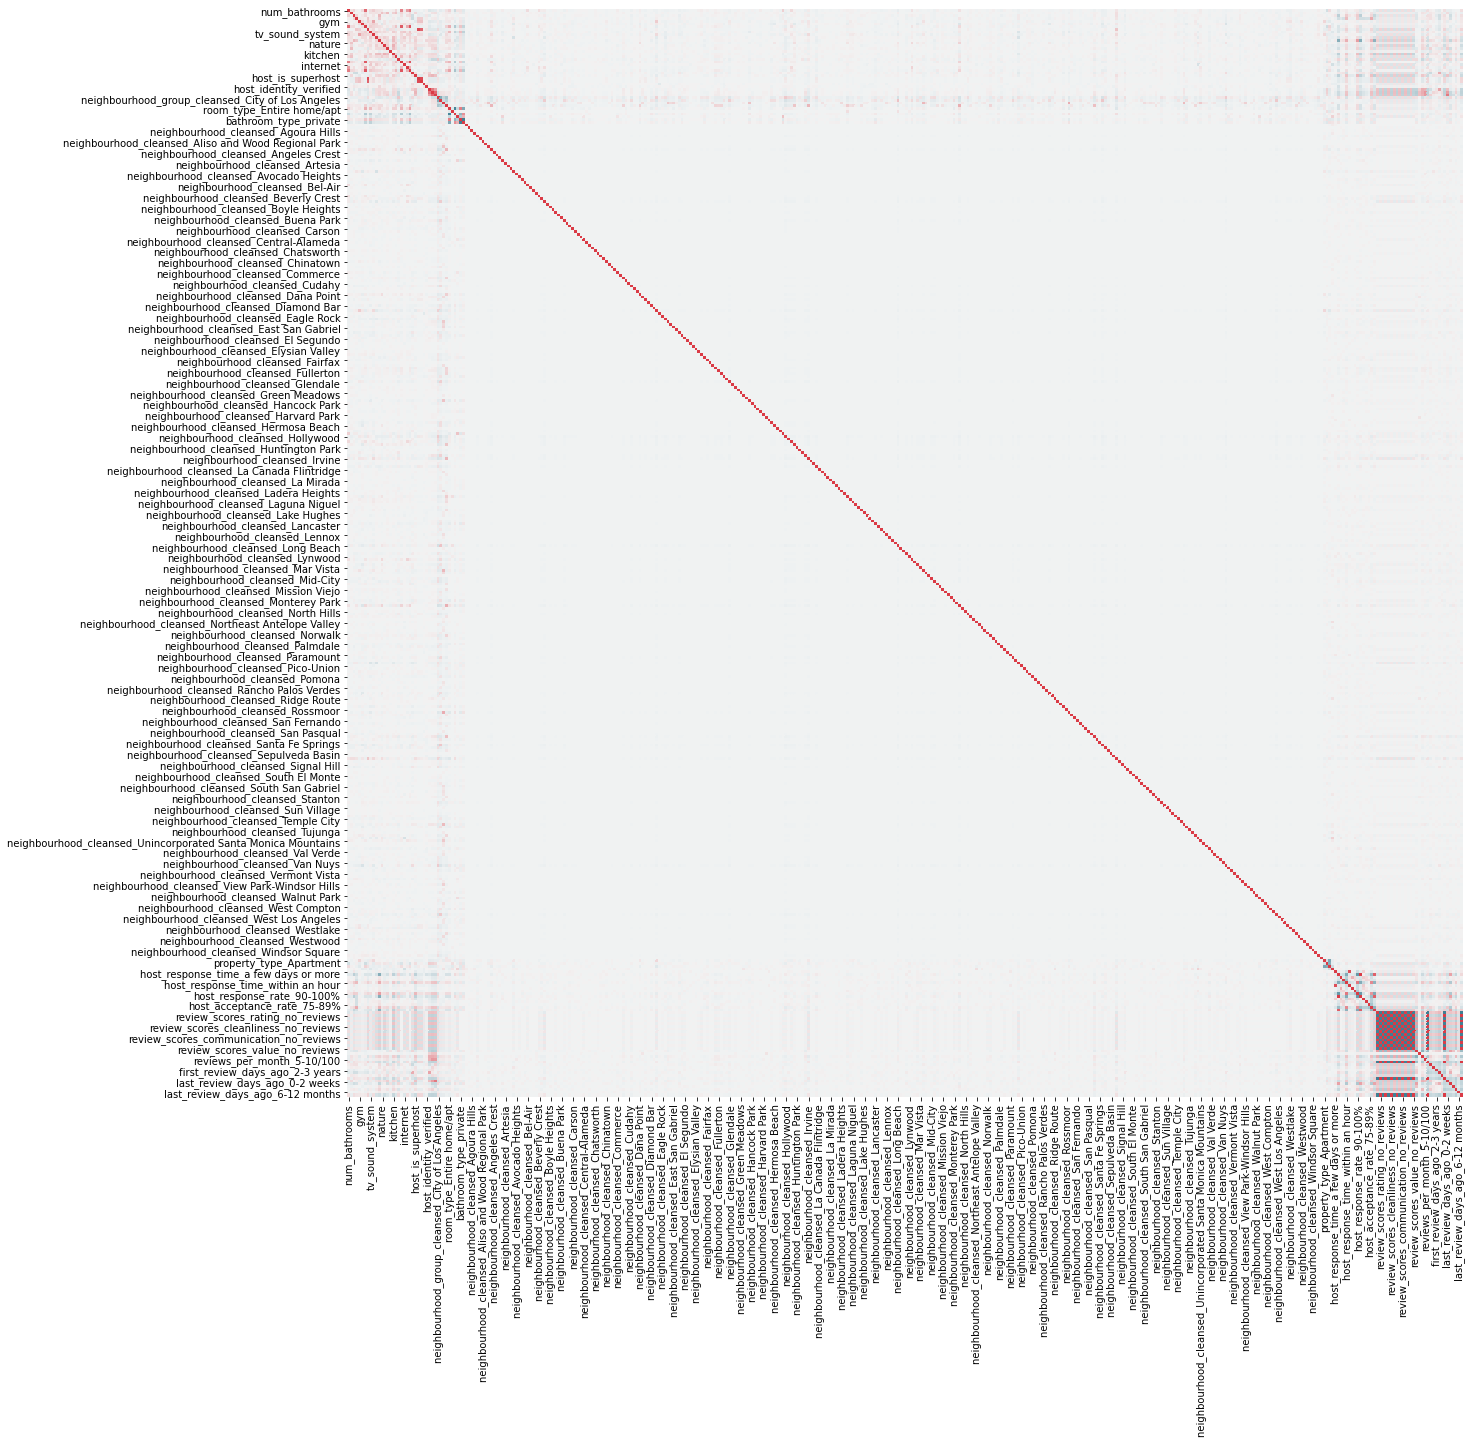

In [191]:
fig, ax = plt.subplots(figsize=(20, 20))
corr = df2.corr()
sns.heatmap(corr, cbar=False, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.show()

It doesn't look like there are any significant collinear relationships with neighbourhoods, so these will temporarily be dropped to produce a clearer heatmap for the remaining features:

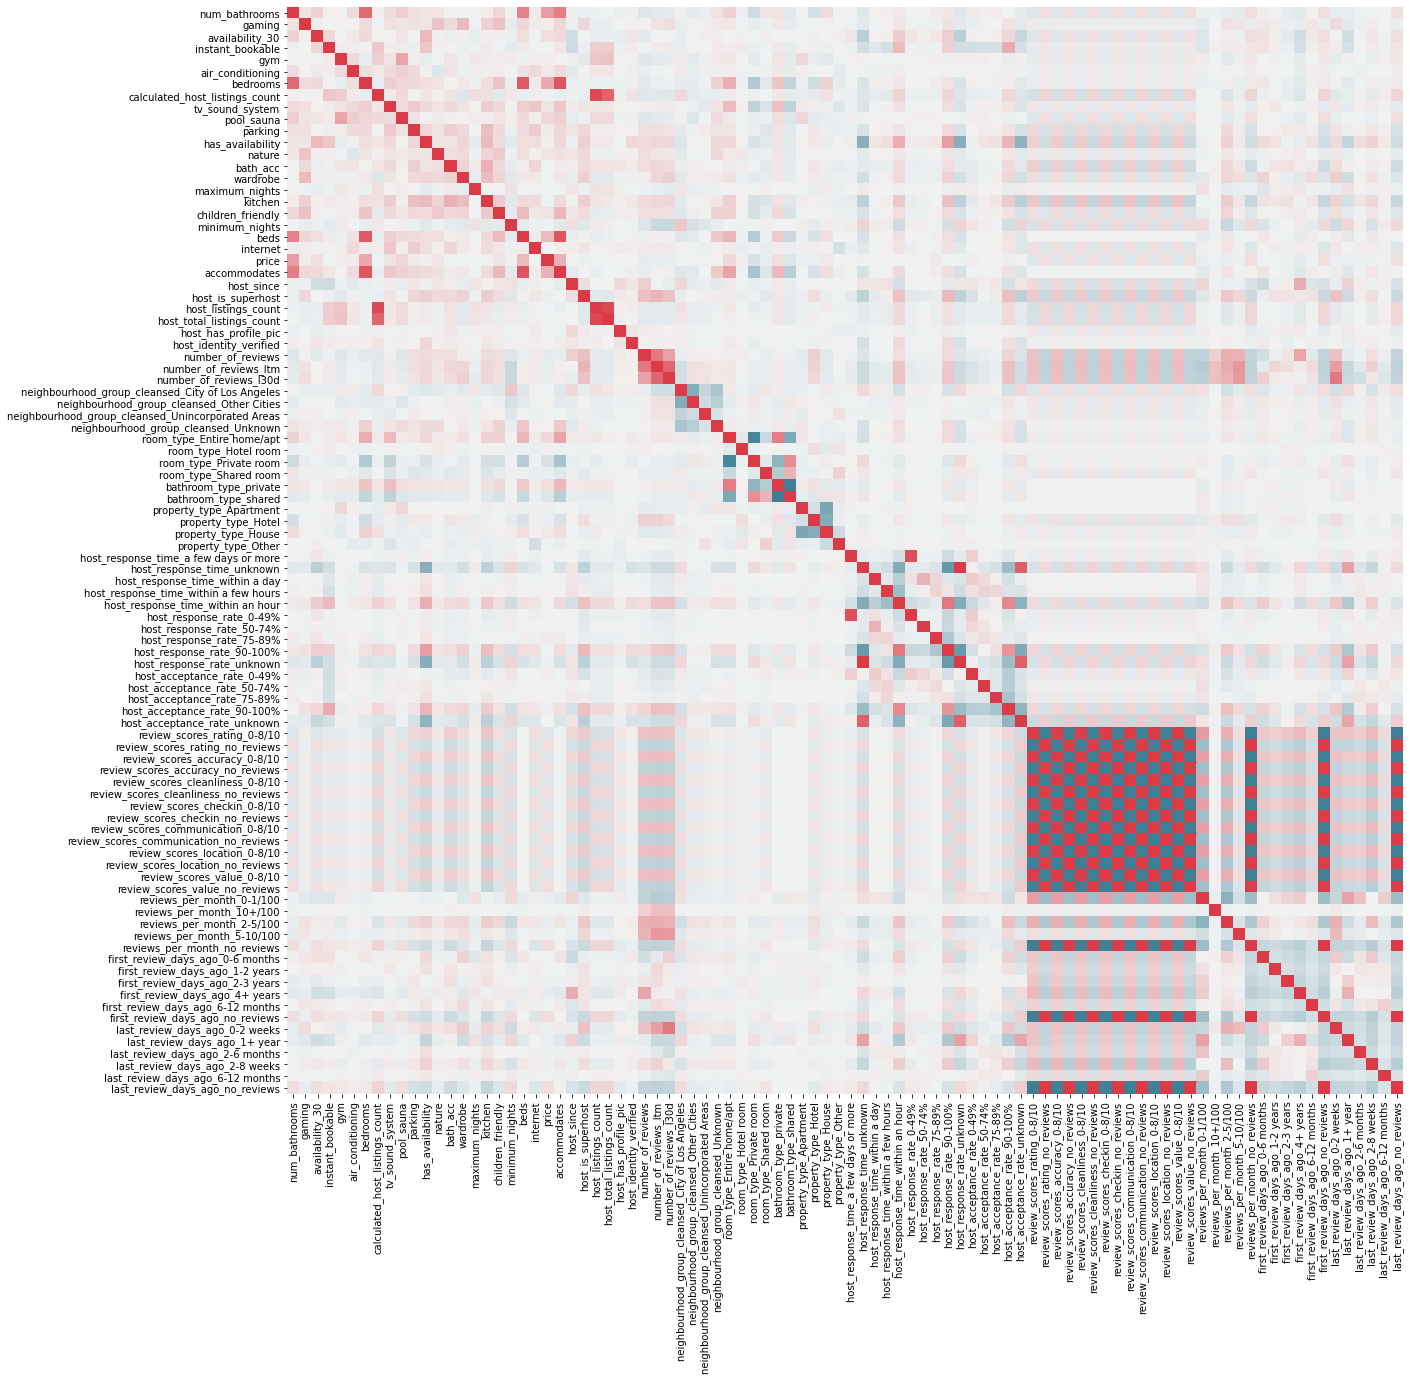

In [192]:
corr = df2.drop(columns=df2.columns[df2.columns.str.startswith('neighbourhood_cleansed_')]).corr()
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, cbar=False, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.show()

### Drop highly multi-collinear attributes

'host_listings_count', 'host_total_listings_count' and 'calculated_host_listings_count' attributes are highly correlated and that's why we decided to remove 'host_total_listings_count' and 'calculated_host_listings_count' attributes.

Also 'bedrooms', 'beds' and 'accommodates' attributes are also highly correlated so we dropped 'bedrooms' and 'beds' attributes since accommodates attribute is more important while booking an airbnb.

In [198]:
df2[['host_listings_count', 'host_total_listings_count', 'calculated_host_listings_count']].corr()

,host_listings_count,host_total_listings_count,calculated_host_listings_count
host_listings_count,1.000000,0.920021,0.907986
host_total_listings_count,0.920021,1.000000,0.772084
calculated_host_listings_count,0.907986,0.772084,1.000000


In [197]:
df2[['bedrooms', 'beds', 'accommodates']].corr()

,bedrooms,beds,accommodates
bedrooms,1.000000,0.815336,0.84492
beds,0.815336,1.000000,0.84563
accommodates,0.844920,0.845630,1.00000


In [199]:
corr_cols_to_drop = ['host_total_listings_count', 'calculated_host_listings_count',
                    'bedrooms', 'beds']
df2 = df2.drop(columns=corr_cols_to_drop)

In [200]:
y = df2.pop('price')
X = df2

In [201]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [202]:
X.shape, y.shape

((45704, 393), (45704,))

## Define K-fold cross validation

In [203]:
# 5-fold cross-validation for avoiding the underfittting or overfitting of model.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
cv = KFold(n_splits=5, random_state=100, shuffle=True)

scoring = {'NMAE': 'neg_mean_absolute_error',
           'NRMSE': 'neg_root_mean_squared_error',
           'R2': 'r2'
        }

In [204]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

## Models

In [205]:
models = {
            'XGBoost': XGBRegressor(random_state=123),
            'Random Forest': RandomForestRegressor(random_state=123)
         }

In [206]:
for model, reg in enumerate(models):
    # evaluation
    print('****** ' + reg + ' ******')
    print('******************************************************************************')
    scores = cross_validate(models[reg], X, y, scoring=scoring, cv=cv, n_jobs=-1)
    res = pd.DataFrame(scores)

    # 5-fold cross validation results
    print(res)
    print('******************************************************************************')
    
    print('Mean NMAE %.3f' %res['test_NMAE'].mean())
    print('Mean NRMSE %.3f' %res['test_NRMSE'].mean())
    print('Mean R2 %.3f' %res['test_R2'].mean())
    
    print('******************************************************************************\n\n')

****** XGBoost ******
******************************************************************************
     fit_time  score_time   test_NMAE  test_NRMSE   test_R2
0  254.679655    0.322522 -115.570084 -416.854313  0.710096
1  253.465173    0.582423 -119.105554 -402.467357  0.540780
2  254.789741    0.384140 -115.520679 -374.687408  0.591236
3  254.840488    0.267613 -123.893012 -467.984937  0.528561
4   54.188755    0.073984 -125.935625 -546.135362  0.557044
******************************************************************************
Mean NMAE -120.005
Mean NRMSE -441.626
Mean R2 0.586
******************************************************************************


****** Random Forest ******
******************************************************************************
     fit_time  score_time   test_NMAE  test_NRMSE   test_R2
0  474.220533    0.763288 -110.909428 -444.988796  0.669643
1  467.259994    1.326083 -113.295325 -397.334023  0.552420
2  472.190581    0.979342 -108.461370 -

### Train the selected model

Our 5-fold cross validation procedure suggests that the XG Boost Regressor outperformed Random Forest Regressor by a small fraction. So we're going to select that model and train it on whole dataset to identify the feature weightage.

In [208]:
reg = XGBRegressor(random_state=123)
reg.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [218]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = reg.predict(X)

print('Training MAE: %.4f' %round(mean_absolute_error(y, y_pred), 4))
print('Training RMSE: %.4f' %round(mean_squared_error(y, y_pred, squared=False), 4))
print('Training R2: %.4f' %round(r2_score(y, y_pred), 4))

Training MAE: 87.8935
Training RMSE: 222.1638
Training R2: 0.8986


### Feature importance

In [229]:
feat_wt_xgb = pd.DataFrame(reg.feature_importances_, columns=['weight'], index=X.columns)
feat_wt_xgb = feat_wt_xgb.sort_values('weight')
feat_wt_xgb.head(200)

,weight
last_review_days_ago_no_reviews,0.000000
neighbourhood_cleansed_Toluca Lake,0.000000
neighbourhood_cleansed_Huntington Park,0.000000
neighbourhood_cleansed_Irwindale,0.000000
neighbourhood_cleansed_Jefferson Park,0.000000
neighbourhood_cleansed_Sylmar,0.000000
neighbourhood_cleansed_La Canada Flintridge,0.000000
neighbourhood_cleansed_La Habra,0.000000
neighbourhood_cleansed_La Habra Heights,0.000000
neighbourhood_cleansed_La Mirada,0.000000


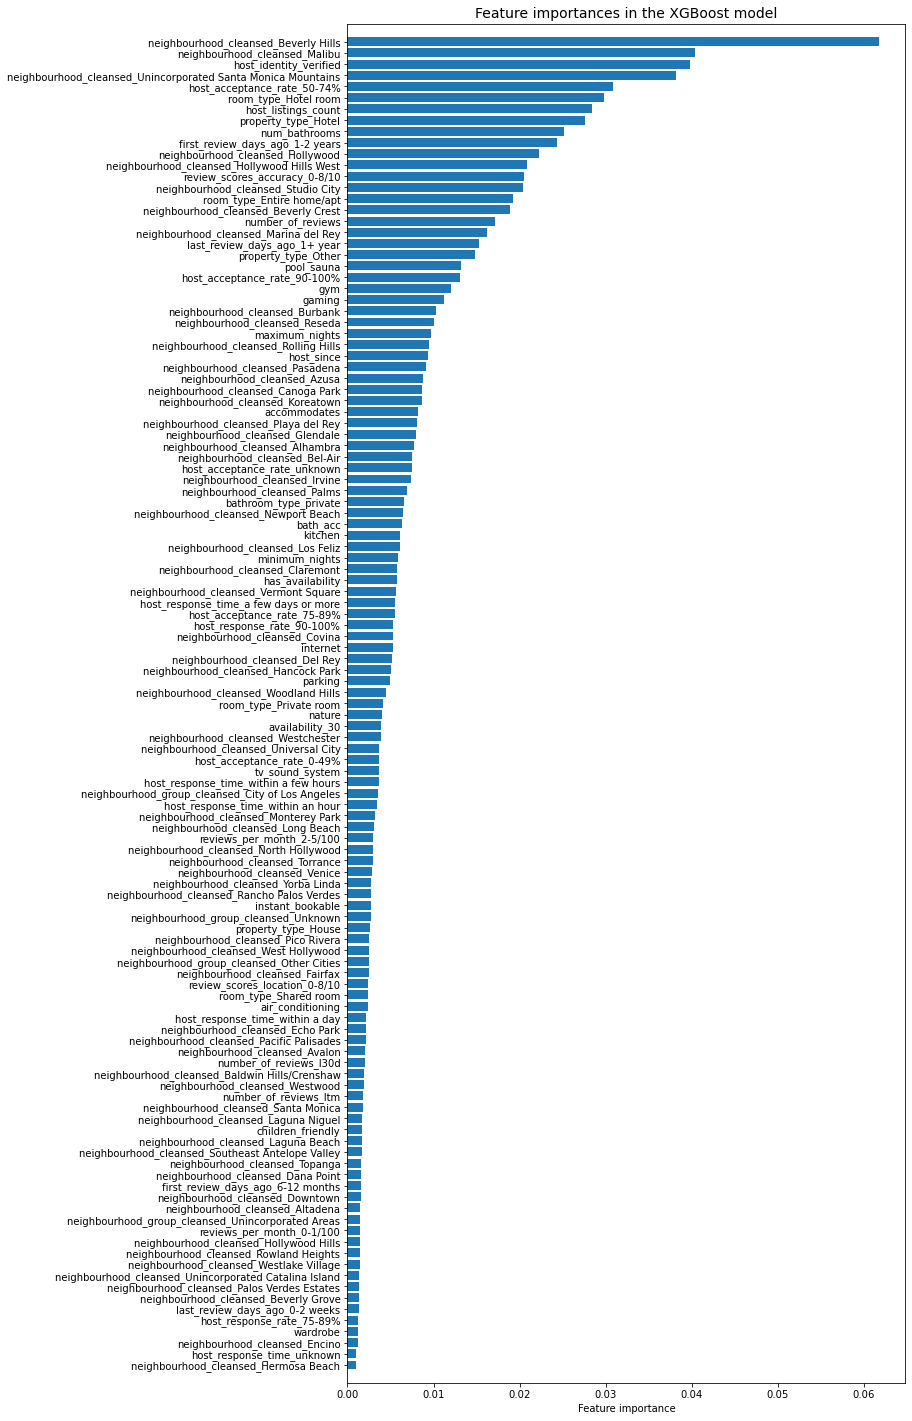

In [231]:
# Plotting feature importances
plt.figure(figsize=(10, 25))
feat_imp = feat_wt_xgb[feat_wt_xgb['weight'] > 0.001]
plt.barh(feat_imp.index, feat_imp.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()